In [ ]:
! pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 236 kB 6.3 MB/s 
     |████████████████████████████████| 140 kB 45.6 MB/s 
     |████████████████████████████████| 62 kB 437 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import json
import requests
import pandas as pd
import spotipy
import random
import numpy as np
import json
import time
import pandas as pd
from google.colab import drive
from google.colab import files
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# API Keys

In [ ]:
# spotify api
ID = "c5c65f1f87754bf08813290a734c4551"
Secret = "3f3adcbf20cf4c7f8ee9e1e3f3769122"

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=ID, client_secret=Secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
# ticketmaster api
api_key = "RK6DcFoA1pVlNA9vPBDsn9OEek3wB3mI"

# API Call Samples

## Ticket Master API Call

https://developer.ticketmaster.com/products-and-docs/apis/getting-started/ 

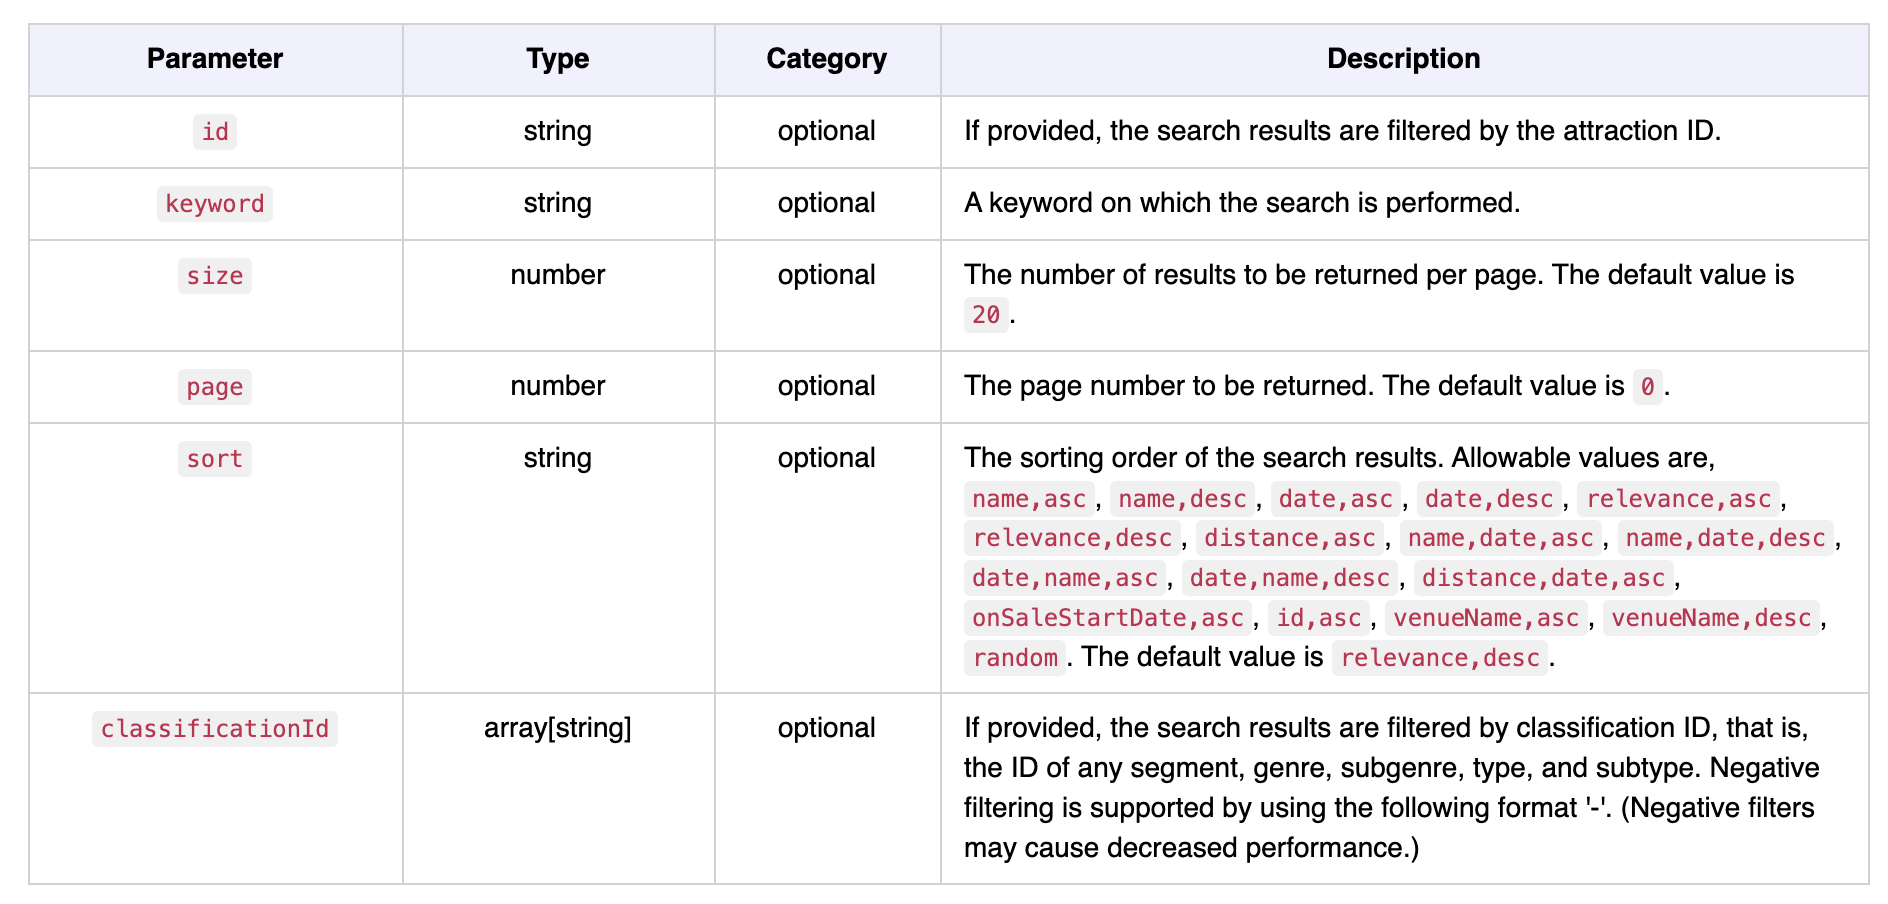

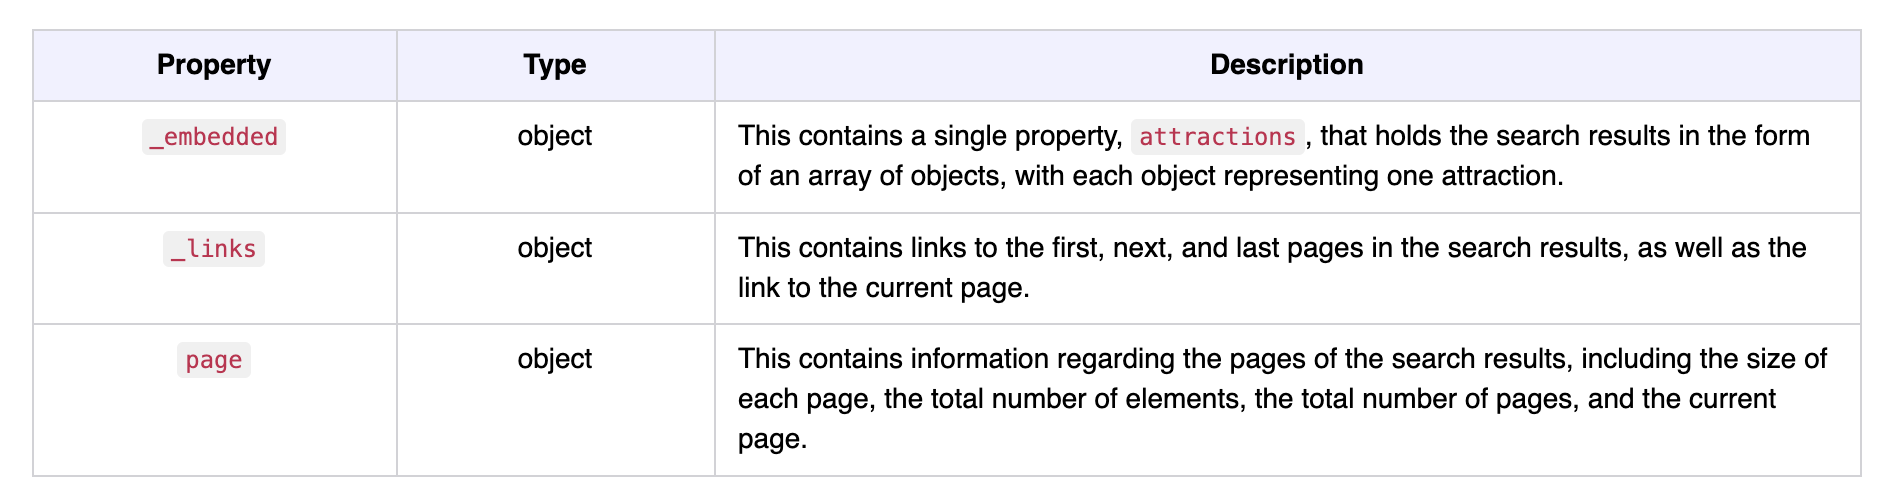

Search for attractions

In [ ]:
response = requests.get('https://app.ticketmaster.com/discovery/v2/attractions',
                        params = {
                            'apikey' : api_key,
                            'keyword' : 'BTS'
                        }).json()

In [ ]:
BTS_attractions_df = pd.DataFrame(response['_embedded']['attractions'])

In [ ]:
BTS_attractions_df.head()

,name,type,id,test,url,locale,externalLinks,aliases,images,classifications,upcomingEvents,_links
0,BTS,attraction,K8vZ917KpXV,False,https://www.ticketmaster.com/bts-tickets/artis...,en-us,{'youtube': [{'url': 'https://www.youtube.com/...,"[map of the soul, 방탄소년단]","[{'ratio': '16_9', 'url': 'https://s1.ticketm....","[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'_total': 0, '_filtered': 0}",{'self': {'href': '/discovery/v2/attractions/K...
1,BTS Live Play,attraction,K8vZ917_SGf,False,https://www.ticketmaster.com/bts-live-play-tic...,en-us,NaN,NaN,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'_total': 0, '_filtered': 0}",{'self': {'href': '/discovery/v2/attractions/K...
2,BTS Neustadt Bremen,attraction,K8vZ917p1T7,False,https://www.ticketmaster.com/bts-neustadt-brem...,en-us,NaN,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....","[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'_total': 0, '_filtered': 0}",{'self': {'href': '/discovery/v2/attractions/K...
3,BTS Rave - Tribute,attraction,Z7r9jZaoON,False,NaN,en-us,NaN,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....","[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'_total': 0, '_filtered': 0}",{'self': {'href': '/discovery/v2/attractions/Z...
4,BT,attraction,K8vZ917upg7,False,https://www.ticketmaster.com/bt-tickets/artist...,en-us,NaN,NaN,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...","[{'primary': True, 'segment': {'id': 'KZFzniwn...","{'_total': 0, '_filtered': 0}",{'self': {'href': '/discovery/v2/attractions/K...


In [ ]:
BTS_attractions_id = list(BTS_attractions_df[BTS_attractions_df['name'].str.contains("BTS")]['id'])

In [ ]:
# get the attraction ids
BTS_attractions_id

['K8vZ917KpXV', 'K8vZ917_SGf', 'K8vZ917p1T7', 'Z7r9jZaoON', 'Z7r9jZaoVC']

Search for events

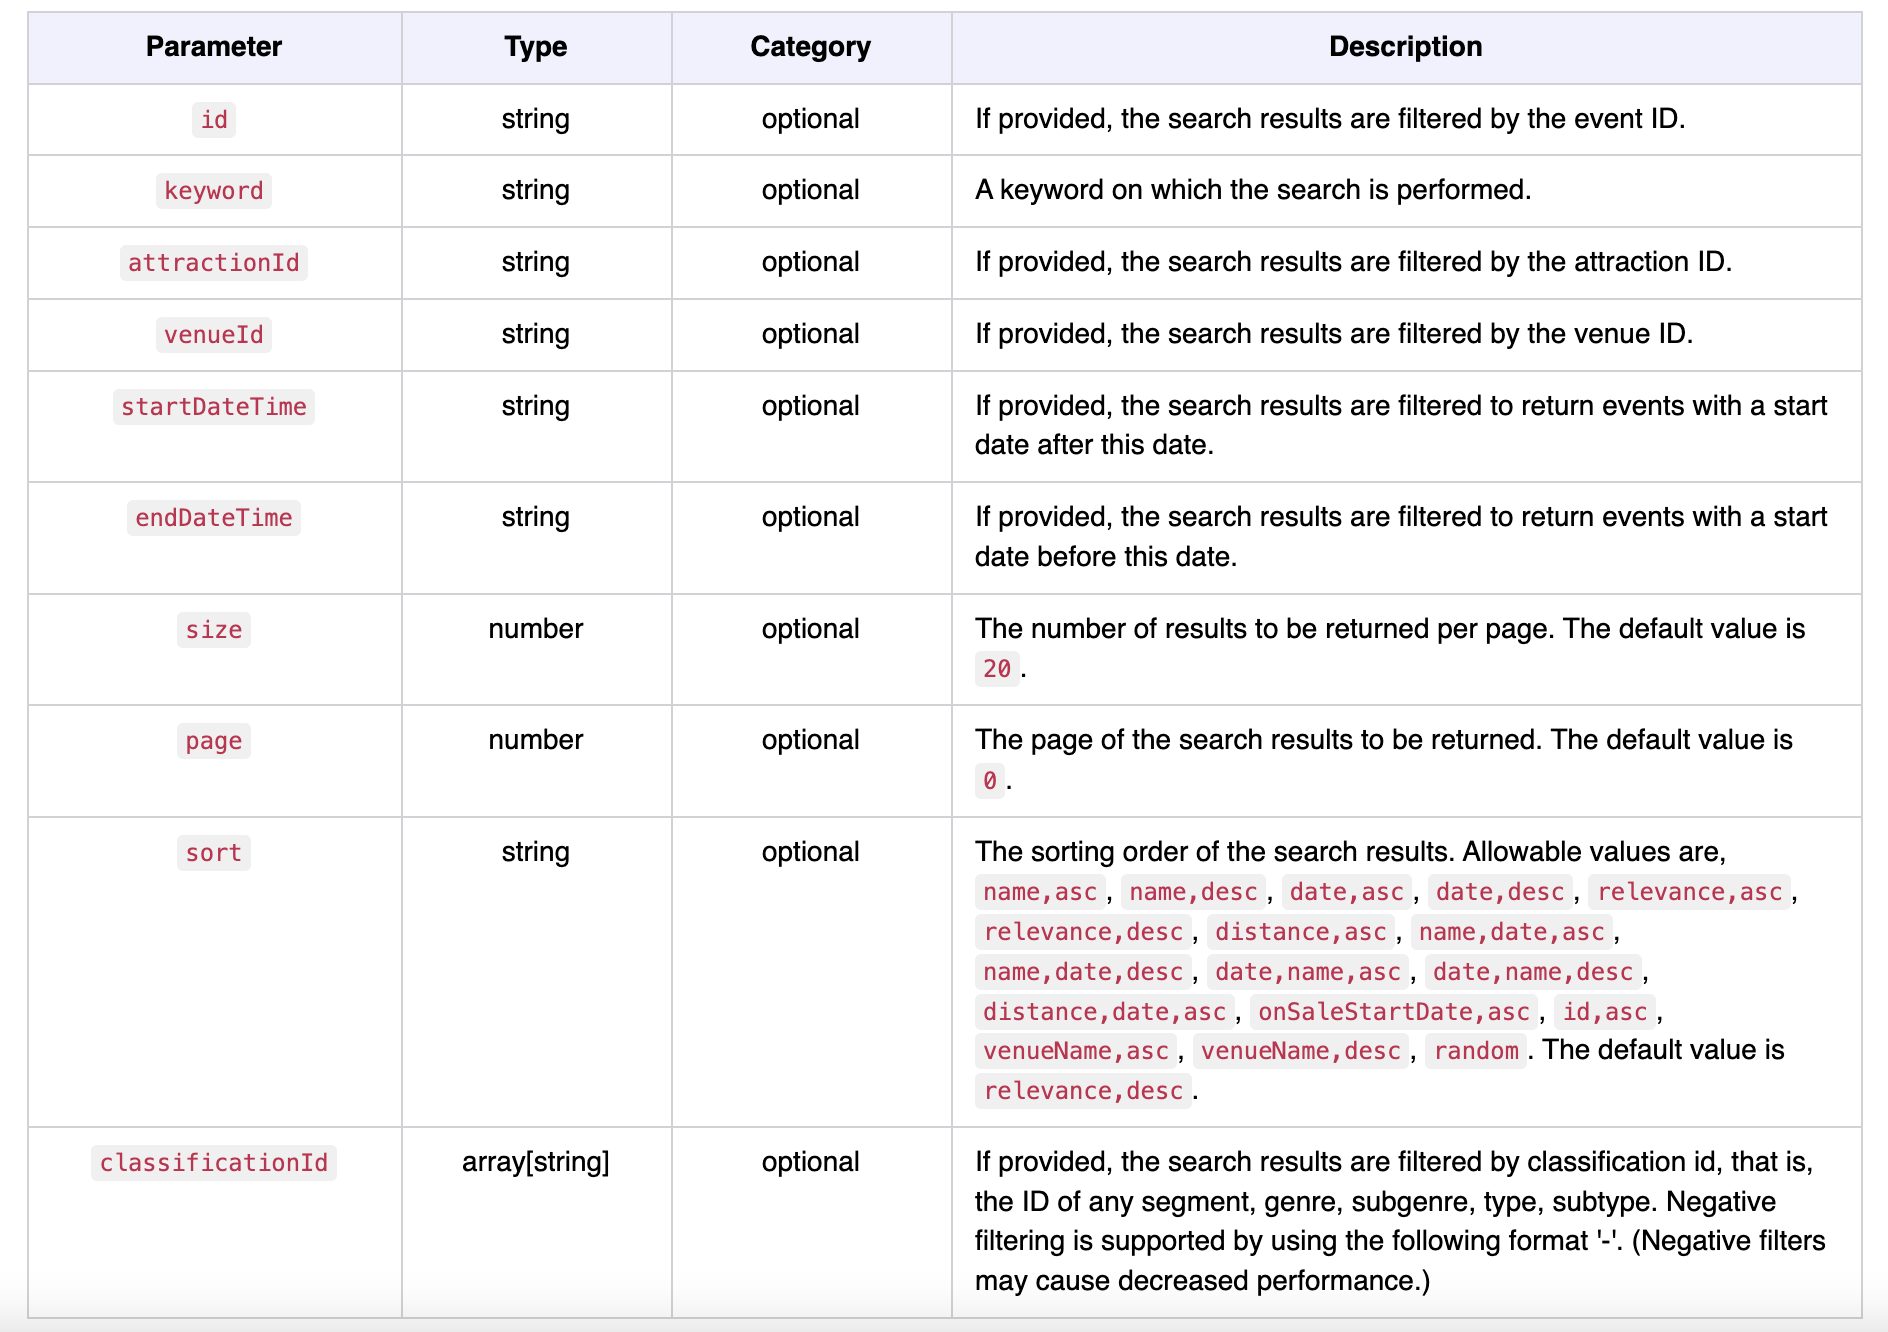

In [ ]:
response = requests.get('https://app.ticketmaster.com/discovery/v2/events',
                        params = {
                            'apikey' : api_key,
                            'keyword' : 'BTS'
                        }).json()

In [ ]:
BTS_events_df = pd.DataFrame(response['_embedded']['events'])

In [ ]:
BTS_events_df[BTS_events_df['name'].str.contains("BTS")]

,name,type,id,test,url,locale,images,sales,dates,classifications,...,_links,_embedded,promoter,promoters,info,pleaseNote,priceRanges,products,seatmap,ticketLimit
0,BTS Club Night,event,G5dFZ9fQSpwqh,False,https://www.ticketweb.uk/event/bts-club-night-...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-06T09:00...,"{'start': {'localDate': '2022-12-10', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5dFZ9...,"{'venues': [{'name': 'The Garage', 'type': 've...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Club 90's Presents: BTS Army Rave 18+ WITH ID,event,G5vbZ9fmJXeqP,False,https://concerts.livenation.com/club-90s-prese...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-14T14:00...,"{'start': {'localDate': '2022-12-03', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'self': {'href': '/discovery/v2/events/G5vbZ9...,"{'venues': [{'name': 'Bogart's', 'type': 'venu...","{'id': '653', 'name': 'LIVE NATION MUSIC', 'de...","[{'id': '653', 'name': 'LIVE NATION MUSIC', 'd...",DOORS:8:30PM SHOW:9PM 18 + WITH VALID ID All s...,DOORS:8:30PM SHOW:9PM 18 + WITH VALID ID All s...,"[{'type': 'standard', 'currency': 'USD', 'min'...",[{'name': 'Live Nation Clear Bag - BTS Rave N...,{'staticUrl': 'https://maps.ticketmaster.com/m...,{'info': 'There is an 8 ticket limit for this ...


## Spotify API Call

https://spotipy.readthedocs.io/en/2.21.0/# \\
https://developer.spotify.com/documentation/web-api/reference/#/

In [ ]:
response = sp.search(q='artist: BTS', type='artist')
pd.DataFrame(response['artists']['items']).head()

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 57454728}","[k-pop, k-pop boy group]",https://api.spotify.com/v1/artists/3Nrfpe0tUJi...,3Nrfpe0tUJi4K4DXYWgMUX,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BTS,90,artist,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX
1,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 1274982}",[korean instrumental],https://api.spotify.com/v1/artists/51sg5jUqKu2...,51sg5jUqKu2tkbmPlwPrNH,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BTS World,35,artist,spotify:artist:51sg5jUqKu2tkbmPlwPrNH
2,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 18}",[],https://api.spotify.com/v1/artists/2X374O7KaQW...,2X374O7KaQWIHUzHeO2yda,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BTSS,13,artist,spotify:artist:2X374O7KaQWIHUzHeO2yda
3,{'spotify': 'https://open.spotify.com/artist/2...,"{'href': None, 'total': 79}",[],https://api.spotify.com/v1/artists/2xYJLtVdKyx...,2xYJLtVdKyxkTRc27CYIlk,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BTSTC,34,artist,spotify:artist:2xYJLtVdKyxkTRc27CYIlk
4,{'spotify': 'https://open.spotify.com/artist/3...,"{'href': None, 'total': 16103}",[],https://api.spotify.com/v1/artists/3DFc7GdsVS5...,3DFc7GdsVS5iBzHI9JuXUq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BTS,3,artist,spotify:artist:3DFc7GdsVS5iBzHI9JuXUq


BTS id is "3Nrfpe0tUJi4K4DXYWgMUX"

In [ ]:
response = sp.artist_albums('spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX')
album_ids = list(pd.DataFrame(response['items'])['id'])

In [ ]:
BTS_all_tracks = []

for id in album_ids:
    response = sp.album_tracks(id)
    BTS_all_tracks += response['items']

In [ ]:
BTS_all_tracks_df = pd.DataFrame(BTS_all_tracks)

In [ ]:
BTS_all_tracks_df

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,238628,False,{'spotify': 'https://open.spotify.com/track/1I...,https://api.spotify.com/v1/tracks/1IthE5GNiRzF...,1IthE5GNiRzFN5CVaCa445,False,Born Singer,https://p.scdn.co/mp3-preview/f4b4b5806ad3c8cb...,1,track,spotify:track:1IthE5GNiRzFN5CVaCa445
1,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,222066,False,{'spotify': 'https://open.spotify.com/track/27...,https://api.spotify.com/v1/tracks/27S8iOXD7Z58...,27S8iOXD7Z58yvJtyk2S9j,False,No More Dream,https://p.scdn.co/mp3-preview/bd2ff7e299b98b3b...,2,track,spotify:track:27S8iOXD7Z58yvJtyk2S9j
2,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,209751,False,{'spotify': 'https://open.spotify.com/track/2G...,https://api.spotify.com/v1/tracks/2GEnvQgSJhed...,2GEnvQgSJhedm2sqZlOP8o,False,N.O,https://p.scdn.co/mp3-preview/15f4cc196f047e21...,3,track,spotify:track:2GEnvQgSJhedm2sqZlOP8o
3,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,231384,False,{'spotify': 'https://open.spotify.com/track/0v...,https://api.spotify.com/v1/tracks/0vMk4IrUfSJQ...,0vMk4IrUfSJQkhwZnVX6us,False,Boy In Luv,https://p.scdn.co/mp3-preview/b96512be866a9407...,4,track,spotify:track:0vMk4IrUfSJQkhwZnVX6us
4,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,245810,False,{'spotify': 'https://open.spotify.com/track/0Q...,https://api.spotify.com/v1/tracks/0Q53fuiKLGjD...,0Q53fuiKLGjDKD7Mme7EoQ,False,Danger,https://p.scdn.co/mp3-preview/3647f9a83e4fb9f9...,5,track,spotify:track:0Q53fuiKLGjDKD7Mme7EoQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,271760,False,{'spotify': 'https://open.spotify.com/track/3U...,https://api.spotify.com/v1/tracks/3UvbL9zd4XTs...,3UvbL9zd4XTsCL8O6Qp2bR,False,Wishing On A Star,https://p.scdn.co/mp3-preview/eeee2b5e968fd001...,9,track,spotify:track:3UvbL9zd4XTsCL8O6Qp2bR
297,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,240680,False,{'spotify': 'https://open.spotify.com/track/5j...,https://api.spotify.com/v1/tracks/5jTNR1Mqi0wL...,5jTNR1Mqi0wLYniACLTmMo,False,Butterfly - Japanese Ver.,https://p.scdn.co/mp3-preview/457d9c26968b4c5b...,10,track,spotify:track:5jTNR1Mqi0wLYniACLTmMo
298,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,284586,False,{'spotify': 'https://open.spotify.com/track/2o...,https://api.spotify.com/v1/tracks/2offgVA6h500...,2offgVA6h500KKIvUYU5kP,False,For You,https://p.scdn.co/mp3-preview/67960a64c083e197...,11,track,spotify:track:2offgVA6h500KKIvUYU5kP
299,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,212200,False,{'spotify': 'https://open.spotify.com/track/6V...,https://api.spotify.com/v1/tracks/6VcJUprKUPI1...,6VcJUprKUPI1jgsQ78MJrO,False,I Need U - Japanese Ver.,https://p.scdn.co/mp3-preview/165d8dd20424bce0...,12,track,spotify:track:6VcJUprKUPI1jgsQ78MJrO


# Intialize Tables

## Artists Table

In [ ]:
artist_list_path = "/content/drive/Shareddrives/CIS550 Project/Dataset/artist-uris.csv"

In [ ]:
artist_list_data = pd.read_csv(artist_list_path, header=None, names=['name', 'uri'])

In [ ]:
artist_list_data

,name,uri
0,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF
1,2:00 AM,spotify:artist:4tN3rZ7cChj4Wns2Wt2Nj6
2,2:15,spotify:artist:4HsOm6VNKZtGh8W8GhdNu4
3,2:54,spotify:artist:3LsQKoRgMc8VEkQn66jfAQ
4,4:20,spotify:artist:5KCG0FDMDPzQpxcohGUnyH
...,...,...
81318,黃曉明,spotify:artist:53F8atvCmVFVOvnKwZXBd3
81319,黃玠瑋,spotify:artist:6VI0p0xTjBKKxQN8i8vGpD
81320,黃義達,spotify:artist:7kaq0LysuRSgBZSorlZ7Vj
81321,黃顯忠 (Huang Xianzhong),spotify:artist:7MuuEryyseo5cvReO6gdPF


In [ ]:
response = sp.artists(list(artist_list_data['uri'])[-1:])
artist_df = pd.DataFrame(response['artists'])

In [ ]:
artist_uri_list = list(artist_list_data['uri'])

In [ ]:
for i in range(len(artist_uri_list)//50):
    response = sp.artists(artist_uri_list[i*50:i*50+50])
    artist_df = pd.concat([artist_df, pd.DataFrame(response['artists'])], axis=0)

In [ ]:
response = sp.artists(artist_uri_list[len(artist_uri_list)//50*50:len(artist_uri_list)//50*50+len(artist_uri_list)%50])
artist_df = pd.concat([artist_df, pd.DataFrame(response['artists'])], axis=0)

In [ ]:
artists_table = artist_df.sort_values(by='popularity', ascending=False)
artists_table = artists_table.reset_index(drop=True)
artists_table = artists_table.head(50000)
artists_table['id'] = range(1, 50001)
artists_table = artists_table[['id', 'name', 'genres', 'images', 'uri', 'external_urls', 'popularity']]

In [ ]:
artists_table

,id,name,genres,images,uri,external_urls,popularity
0,1,Taylor Swift,[pop],"[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:06HL4z0CvFAxyc27GXpf02,{'spotify': 'https://open.spotify.com/artist/0...,100
1,2,Bad Bunny,"[reggaeton, trap latino]","[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:4q3ewBCX7sLwd24euuV69X,{'spotify': 'https://open.spotify.com/artist/4...,97
2,3,Drake,"[canadian hip hop, canadian pop, hip hop, rap,...","[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:3TVXtAsR1Inumwj472S9r4,{'spotify': 'https://open.spotify.com/artist/3...,97
3,4,Bad Bunny,"[reggaeton, trap latino]","[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:4q3ewBCX7sLwd24euuV69X,{'spotify': 'https://open.spotify.com/artist/4...,97
4,5,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]","[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,{'spotify': 'https://open.spotify.com/artist/1...,93
...,...,...,...,...,...,...,...
49995,49996,Damn 2 Sexy,[dutch moombahton],"[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:5GqEE5As0D15KAEkBiir37,{'spotify': 'https://open.spotify.com/artist/5...,20
49996,49997,Bones,[],"[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:6qVC8m27i8kYNfBNyIt4yW,{'spotify': 'https://open.spotify.com/artist/6...,20
49997,49998,Michael Happoldt,[],[],spotify:artist:5tt4msHeXL4Xex9Yon7oTa,{'spotify': 'https://open.spotify.com/artist/5...,20
49998,49999,Superdoer,[],"[{'height': 640, 'url': 'https://i.scdn.co/ima...",spotify:artist:0Ep4wdzo5j7IffaowSakiQ,{'spotify': 'https://open.spotify.com/artist/0...,20


In [ ]:
artists_table.to_csv("artists_table.csv", index=False)
files.download('artists_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
artist_df.to_csv("artist_df.csv", index=False)
files.download('artist_df.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Songs Table

In [ ]:
all_tracks = []
artist_uris = list(artists_table['uri'])
artist_ids = list(artists_table['id'])

In [ ]:
for i in range(2000):
    response = sp.artist_albums(artist_uris[i])
    album_ids = list(pd.DataFrame(response['items'])['id'])
    time.sleep(0.2)
    for id in album_ids:
        response = sp.album_tracks(id)
        for item in response['items']:
            item['artistId'] = artist_ids[i]
        all_tracks += response['items']
        time.sleep(0.1)

In [ ]:
all_songs = pd.DataFrame(all_tracks)

In [ ]:
all_songs.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri,artistId
0,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,202395,True,{'spotify': 'https://open.spotify.com/track/4g...,https://api.spotify.com/v1/tracks/4g2c7NoTWAOS...,4g2c7NoTWAOSYDy44l9nub,False,Lavender Haze,None,1,track,spotify:track:4g2c7NoTWAOSYDy44l9nub,1
1,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,218270,True,{'spotify': 'https://open.spotify.com/track/19...,https://api.spotify.com/v1/tracks/199E1RRrVmVT...,199E1RRrVmVTQqBXih5qRC,False,Maroon,None,2,track,spotify:track:199E1RRrVmVTQqBXih5qRC,1
2,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,200690,False,{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02Zkkf2zMkwR...,02Zkkf2zMkwRGQjZ7T4p8f,False,Anti-Hero,None,3,track,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,1
3,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,256124,True,{'spotify': 'https://open.spotify.com/track/6A...,https://api.spotify.com/v1/tracks/6ADDIJxxqzM9...,6ADDIJxxqzM9LMpm78yzQG,False,Snow On The Beach (feat. Lana Del Rey),None,4,track,spotify:track:6ADDIJxxqzM9LMpm78yzQG,1
4,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,194206,False,{'spotify': 'https://open.spotify.com/track/7g...,https://api.spotify.com/v1/tracks/7gVWKBcfIW93...,7gVWKBcfIW93YxNBi3ApIE,False,"You're On Your Own, Kid",None,5,track,spotify:track:7gVWKBcfIW93YxNBi3ApIE,1


In [ ]:
songs_table = all_songs[['id', 'artistId', 'name', 'artists', 'uri', 'available_markets', 'duration_ms', 'external_urls']]

In [ ]:
songs_table.rename(columns={'id':'api_id'})
songs_table['id'] = range(1, len(songs_table)+1)

<ipython-input-68-d228f45d2feb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_table['id'] = range(1, len(songs_table)+1)


In [ ]:
songs_table

,id,artistId,name,artists,uri,available_markets,duration_ms,external_urls
0,1,1,Lavender Haze,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:4g2c7NoTWAOSYDy44l9nub,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",202395,{'spotify': 'https://open.spotify.com/track/4g...
1,2,1,Maroon,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:199E1RRrVmVTQqBXih5qRC,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",218270,{'spotify': 'https://open.spotify.com/track/19...
2,3,1,Anti-Hero,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",200690,{'spotify': 'https://open.spotify.com/track/02...
3,4,1,Snow On The Beach (feat. Lana Del Rey),[{'external_urls': {'spotify': 'https://open.s...,spotify:track:6ADDIJxxqzM9LMpm78yzQG,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",256124,{'spotify': 'https://open.spotify.com/track/6A...
4,5,1,"You're On Your Own, Kid",[{'external_urls': {'spotify': 'https://open.s...,spotify:track:7gVWKBcfIW93YxNBi3ApIE,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",194206,{'spotify': 'https://open.spotify.com/track/7g...
...,...,...,...,...,...,...,...,...
103038,103039,465,Hard To Sleep,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:4C1iDoglq2TjMvZvdppnQO,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",144685,{'spotify': 'https://open.spotify.com/track/4C...
103039,103040,465,You,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:1jHIFnomBE8zZAIod5QMKF,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",163384,{'spotify': 'https://open.spotify.com/track/1j...
103040,103041,465,Black Clouds,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:47krELU6KsllHVKeffavaq,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",256000,{'spotify': 'https://open.spotify.com/track/47...
103041,103042,465,Plug Cry,[{'external_urls': {'spotify': 'https://open.s...,spotify:track:4Xyci4Je0MHXnxUR1vXHVH,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",207529,{'spotify': 'https://open.spotify.com/track/4X...


In [ ]:
songs_table.to_csv("songs_table.csv", index=False)
files.download('songs_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Events Table

In [ ]:
all_events = []
participation = []
idx = 1

In [ ]:
artists_names = list(artists_table['name'])

In [ ]:
response = requests.get('https://app.ticketmaster.com/discovery/v2/events',
                    params = {
                        'apikey' : api_key,
                        'keyword' : artists_names[0],
                        'size' : 200
                    }).json()

In [ ]:
for name in artists_names[:2000]:
    try:
        response = requests.get('https://app.ticketmaster.com/discovery/v2/events',
                        params = {
                            'apikey' : api_key,
                            'keyword' : name,
                            'size' : 200
                        }).json()
        if response['page']['totalElements'] > 0:
            all_events += response['_embedded']['events']
            for e in response['_embedded']['events']:
                participation.append((idx, e['id']))
    except:
        print(name)
    time.sleep(0.1)
    idx += 1

In [ ]:
all_events_df = pd.DataFrame(all_events)

In [ ]:
all_events_df.columns

Index(['name', 'type', 'id', 'test', 'url', 'locale', 'images', 'sales',
       'dates', 'classifications', 'pleaseNote', 'priceRanges', 'products',
       'seatmap', 'accessibility', 'ticketLimit', 'ageRestrictions',
       'ticketing', '_links', '_embedded', 'promoter', 'promoters', 'info',
       'outlets', 'doorsTimes', 'description', 'place'],
      dtype='object')

In [ ]:
events_df = all_events_df[['id', 'name', 'images', 'url', '_embedded', 'sales', 'dates', 'priceRanges', 'products']]

In [ ]:
events_df

,id,name,images,url,_embedded,sales,dates,priceRanges,products
0,G5vfZ9Ke2w0pe,The Taylor Party: Taylor Swift Night,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.com/the-taylor-party-...,"{'venues': [{'name': '9:30 CLUB', 'type': 'ven...",{'public': {'startDateTime': '2022-09-23T14:00...,"{'start': {'localDate': '2023-01-27', 'localTi...","[{'type': 'standard', 'currency': 'USD', 'min'...",[{'name': '9:30 Club Parking - The Taylor Part...
1,G5vZZ9K3gs3A8,The Taylor Party: Taylor Swift Night,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.ca/the-taylor-party-t...,{'venues': [{'name': 'The Danforth Music Hall'...,{'public': {'startDateTime': '2022-09-23T14:00...,"{'start': {'localDate': '2022-11-25', 'localTi...","[{'type': 'standard', 'currency': 'CAD', 'min'...",NaN
2,G5vjZ99ZIFIYy,The Taylor Party: Taylor Swift Night,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://concerts.livenation.com/the-taylor-par...,{'venues': [{'name': 'House of Blues Las Vegas...,{'public': {'startDateTime': '2022-11-18T18:00...,"{'start': {'localDate': '2023-01-14', 'localTi...","[{'type': 'standard', 'currency': 'USD', 'min'...",[{'name': 'Fast Lane Access - Taylor Swift Nig...
3,G5viZ9pHKZBcP,The Taylor Party: Taylor Swift Night,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketweb.com/event/the-taylor-par...,"{'venues': [{'name': 'The Signal', 'type': 've...",{'public': {'startDateTime': '2022-11-18T15:00...,"{'start': {'localDate': '2023-01-27', 'localTi...",NaN,NaN
4,G5e0Z99ZH3oqy,Taylor Rave - a Taylor Swift Rave,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketweb.com/event/taylor-rave-a-...,"{'venues': [{'name': 'August Hall', 'type': 'v...",{'public': {'startDateTime': '2022-11-16T23:00...,"{'start': {'localDate': '2023-02-03', 'localTi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
23631,G5v8Z94xTaKgg,Tecate Pal Norte 2023 General + Domingo,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,"{'venues': [{'name': 'Parque Fundidora', 'type...",{'public': {'startDateTime': '2022-11-15T20:00...,"{'start': {'localDate': '2023-04-02', 'localTi...","[{'type': 'standard', 'currency': 'MXN', 'min'...",NaN
23632,G5v8Z943PLdAJ,Tecate Pal Norte 2023 Abono General,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,"{'venues': [{'name': 'Parque Fundidora', 'type...",{'public': {'startDateTime': '2022-11-07T20:00...,"{'start': {'localDate': '2023-03-31', 'localTi...","[{'type': 'standard', 'currency': 'MXN', 'min'...",NaN
23633,G5v8Z943_jo7j,Tecate Pal Norte 2023 (Abono Ascendente),"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,"{'venues': [{'name': 'Parque Fundidora', 'type...",{'public': {'startDateTime': '2022-11-07T20:00...,"{'start': {'localDate': '2023-03-31', 'localTi...","[{'type': 'standard', 'currency': 'MXN', 'min'...",NaN
23634,G5v8Z94KfKk2a,Tecate Pal Norte (Abono Vip),"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,"{'venues': [{'name': 'Parque Fundidora', 'type...",{'public': {'startDateTime': '2022-11-07T20:00...,"{'start': {'localDate': '2023-03-31', 'localTi...","[{'type': 'standard', 'currency': 'MXN', 'min'...",NaN


In [ ]:
def func1(x):
    try:
        return x['venues'][0]['id']
    except: 
        return None

def func2(x):
    try:
        return x['start']['localDate']
    except: 
        return None

def func3(x):
    try:
        return x['start']['localTime']
    except: 
        return None

def func4(x):
    try:
        return x[0]['min']
    except: 
        return None

def func5(x):
    try:
        return x[0]['max']
    except: 
        return None

def func6(x):
    try:
        return x[0]['name']
    except: 
        return None

In [ ]:
events_df['venues'] = events_df['_embedded'].apply(func1)
events_df['date'] = events_df['dates'].apply(func2)
events_df['time'] = events_df['dates'].apply(func3)
events_df['priceFrom'] = events_df['priceRanges'].apply(func4)
events_df['priceTo'] = events_df['priceRanges'].apply(func5)
events_df['products'] = events_df['products'].apply(func6)

In [ ]:
events_table = events_df[['id', 'name', 'products', 'images', 'url', 'date', 'time', 'priceFrom', 'priceTo', 'venues']]

In [ ]:
events_table

,id,name,products,images,url,date,time,priceFrom,priceTo,venues
0,G5vfZ9Ke2w0pe,The Taylor Party: Taylor Swift Night,9:30 Club Parking - The Taylor Party,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.com/the-taylor-party-...,2023-01-27,20:00:00,22.0,22.0,KovZpZA7knFA
1,G5vZZ9K3gs3A8,The Taylor Party: Taylor Swift Night,None,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.ca/the-taylor-party-t...,2022-11-25,20:00:00,20.0,35.0,KovZpa3yBe
2,G5vjZ99ZIFIYy,The Taylor Party: Taylor Swift Night,Fast Lane Access - Taylor Swift Night - Not a ...,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://concerts.livenation.com/the-taylor-par...,2023-01-14,21:00:00,20.0,20.0,KovZpZA7klAA
3,G5viZ9pHKZBcP,The Taylor Party: Taylor Swift Night,None,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketweb.com/event/the-taylor-par...,2023-01-27,21:00:00,NaN,NaN,KovZ917AhGG
4,G5e0Z99ZH3oqy,Taylor Rave - a Taylor Swift Rave,None,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketweb.com/event/taylor-rave-a-...,2023-02-03,22:00:00,NaN,NaN,KovZ917ALXF
...,...,...,...,...,...,...,...,...,...,...
23631,G5v8Z94xTaKgg,Tecate Pal Norte 2023 General + Domingo,None,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,2023-04-02,14:00:00,2495.0,2845.0,KovZpZAJn7nA
23632,G5v8Z943PLdAJ,Tecate Pal Norte 2023 Abono General,None,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,2023-03-31,14:00:00,5848.0,5848.0,KovZpZAJn7nA
23633,G5v8Z943_jo7j,Tecate Pal Norte 2023 (Abono Ascendente),None,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,2023-03-31,14:00:00,8288.0,8288.0,KovZpZAJn7nA
23634,G5v8Z94KfKk2a,Tecate Pal Norte (Abono Vip),None,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.com.mx/tecate-pal-nor...,2023-03-31,14:00:00,9435.0,9435.0,KovZpZAJn7nA


In [ ]:
events_table.to_csv("events_table.csv", index=False)
files.download('events_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Venues Table

In [ ]:
all_venues = []
for v in list(events_df['_embedded']):
    try:
        all_venues.append(v['venues'][0])
    except:
        print(v)

In [ ]:
venues_df = pd.DataFrame(all_venues)
venues_df = venues_df.drop_duplicates(subset=['id'])
venues_df['city'] = venues_df['city'].apply(lambda x: str(x)[10:-2])
venues_df['state'] = venues_df['state'].apply(lambda x: str(x).split(',')[0][10:-1])
venues_df['country'] = venues_df['country'].apply(lambda x: str(x).split(',')[0][10:-1])
venues_df['address'] = venues_df['address'].apply(lambda x: str(x)[11:-2].strip())

In [ ]:
venues_df.columns

Index(['name', 'type', 'id', 'test', 'url', 'locale', 'postalCode', 'timezone',
       'city', 'state', 'country', 'address', 'location', 'markets', 'dmas',
       'upcomingEvents', '_links', 'images', 'social', 'boxOfficeInfo',
       'parkingDetail', 'accessibleSeatingDetail', 'generalInfo', 'ada',
       'aliases'],
      dtype='object')

In [ ]:
venues_table = venues_df[['id', 'name', 'url', 'address', 'city', 'state', 'country', 'postalCode']]
venues_table

,id,name,url,address,city,state,country,postalCode
0,KovZpZA7knFA,9:30 CLUB,https://www.ticketmaster.com/930-club-tickets-...,815 V Street N.W.,Washington,District of Columbia,United States Of America,20001
1,KovZpa3yBe,The Danforth Music Hall,https://www.ticketmaster.ca/the-danforth-music...,147 Danforth Ave.,Toronto,Ontario,Canada,M4K 1N2
2,KovZpZA7klAA,House of Blues Las Vegas,https://www.ticketmaster.com/house-of-blues-la...,3950 Las Vegas Blvd,Las Vegas,Nevada,United States Of America,89119
3,KovZ917AhGG,The Signal,https://www.ticketmaster.com/the-signal-ticket...,1810 Chestnut St,Chattanooga,Tennessee,United States Of America,37408
4,KovZ917ALXF,August Hall,https://www.ticketmaster.com/august-hall-ticke...,420 Mason St,San Francisco,California,United States Of America,94102
...,...,...,...,...,...,...,...,...
23390,KovZ9177sSf,Eden Court Theatre,https://www.ticketmaster.co.uk/eden-court-thea...,Bishop's Road,Inverness,,Great Britain,IV3 5SA
23406,KovZ917AxrY,Churchill Island,https://www.ticketmaster.com.au/churchill-isla...,246 Samuel Amess Drive,Newhaven,Victoria,Australia,3925
23409,rZ7HnEZ17o_ug,Ocean Casino Resort - HQ2 Nightclub,https://www.ticketweb.com/venue/ocean-casino-r...,500 Boardwalk,Atlantic City,New Jersey,United States Of America,08401
23423,KovZpZA7AkIA,Julie Rogers Theatre,https://www.ticketmaster.com/julie-rogers-thea...,765 Pearl Street,Beaumont,Texas,United States Of America,77701


In [ ]:
venues_table.to_csv("venues_table.csv", index=False)
files.download('venues_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Participation Table

In [ ]:
part_table = pd.DataFrame(participation, columns=['artistId', 'eventId'])

In [ ]:
part_table

,artistId,eventId
0,1,G5vfZ9Ke2w0pe
1,1,G5vZZ9K3gs3A8
2,1,G5vjZ99ZIFIYy
3,1,G5viZ9pHKZBcP
4,1,G5e0Z99ZH3oqy
...,...,...
23631,1998,G5v8Z94xTaKgg
23632,1998,G5v8Z943PLdAJ
23633,1998,G5v8Z943_jo7j
23634,1998,G5v8Z94KfKk2a


In [ ]:
part_table.to_csv("part_table.csv", index=False)
files.download('part_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Follow Table

Dynamic table, created and modified through DB.

## Reservation Table

Dynamic table, created and modified through DB.

## User Table

Dynamic table, created and modified through DB.

# Edit Tables

All the table generated above are downloaded to csv files. To modify any of them, use this section as the playground.

In [ ]:
venues_table = pd.read_csv("/content/drive/Shareddrives/CIS550 Project/Dataset/venues_table.csv")
events_table = pd.read_csv("/content/drive/Shareddrives/CIS550 Project/Dataset/events_table.csv")
part_table = pd.read_csv("/content/drive/Shareddrives/CIS550 Project/Dataset/part_table.csv")

In [ ]:
artists_table = pd.read_csv("/content/drive/Shareddrives/CIS550 Project/Dataset/artists_table.csv")

In [ ]:
venues_table = venues_table.drop_duplicates(subset=['id']).rename(columns={'id':'api_id'})
venues_table['id'] = range(1, len(venues_table)+1)
venues_table

,api_id,name,url,address,city,state,country,postalCode,id
0,KovZpZA7knFA,9:30 CLUB,https://www.ticketmaster.com/930-club-tickets-...,815 V Street N.W.,Washington,District of Columbia,United States Of America,20001,1
1,KovZpa3yBe,The Danforth Music Hall,https://www.ticketmaster.ca/the-danforth-music...,147 Danforth Ave.,Toronto,Ontario,Canada,M4K 1N2,2
2,KovZpZA7klAA,House of Blues Las Vegas,https://www.ticketmaster.com/house-of-blues-la...,3950 Las Vegas Blvd,Las Vegas,Nevada,United States Of America,89119,3
3,KovZ917AhGG,The Signal,https://www.ticketmaster.com/the-signal-ticket...,1810 Chestnut St,Chattanooga,Tennessee,United States Of America,37408,4
4,KovZ917ALXF,August Hall,https://www.ticketmaster.com/august-hall-ticke...,420 Mason St,San Francisco,California,United States Of America,94102,5
...,...,...,...,...,...,...,...,...,...
3168,KovZ9177sSf,Eden Court Theatre,https://www.ticketmaster.co.uk/eden-court-thea...,Bishop's Road,Inverness,NaN,Great Britain,IV3 5SA,3169
3169,KovZ917AxrY,Churchill Island,https://www.ticketmaster.com.au/churchill-isla...,246 Samuel Amess Drive,Newhaven,Victoria,Australia,3925,3170
3170,rZ7HnEZ17o_ug,Ocean Casino Resort - HQ2 Nightclub,https://www.ticketweb.com/venue/ocean-casino-r...,500 Boardwalk,Atlantic City,New Jersey,United States Of America,08401,3171
3171,KovZpZA7AkIA,Julie Rogers Theatre,https://www.ticketmaster.com/julie-rogers-thea...,765 Pearl Street,Beaumont,Texas,United States Of America,77701,3172


In [ ]:
events_table = events_table.drop_duplicates(subset=['id']).rename(columns={'id':'api_id'})
events_table['id'] = range(1, len(events_table)+1)
events_table

,api_id,name,products,images,url,date,time,priceFrom,priceTo,venues,id
0,G5vfZ9Ke2w0pe,The Taylor Party: Taylor Swift Night,9:30 Club Parking - The Taylor Party,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.com/the-taylor-party-...,2023-01-27,20:00:00,22.00,22.00,KovZpZA7knFA,1
1,G5vZZ9K3gs3A8,The Taylor Party: Taylor Swift Night,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.ca/the-taylor-party-t...,2022-11-25,20:00:00,20.00,35.00,KovZpa3yBe,2
2,G5vjZ99ZIFIYy,The Taylor Party: Taylor Swift Night,Fast Lane Access - Taylor Swift Night - Not a ...,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://concerts.livenation.com/the-taylor-par...,2023-01-14,21:00:00,20.00,20.00,KovZpZA7klAA,3
3,G5viZ9pHKZBcP,The Taylor Party: Taylor Swift Night,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketweb.com/event/the-taylor-par...,2023-01-27,21:00:00,NaN,NaN,KovZ917AhGG,4
4,G5e0Z99ZH3oqy,Taylor Rave - a Taylor Swift Rave,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketweb.com/event/taylor-rave-a-...,2023-02-03,22:00:00,NaN,NaN,KovZ917ALXF,5
...,...,...,...,...,...,...,...,...,...,...,...
23614,G5d7Z98JwCw8I,SKEGSS,Stationnement Theatre Corona Parking - Skegss,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",https://www.ticketmaster.ca/skegss-montreal-qu...,2022-11-23,19:30:00,25.00,28.00,KovZpZA6dn7A,19275
23623,G5eVZ9Cw0RKEm,Southern Soul Music Festival,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.com/southern-soul-mus...,2022-12-10,19:00:00,94.50,155.00,KovZpZAEkA6A,19276
23624,G5e8Z9pX5po3u,AMJAZZ Presents Silver,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.co.nz/amjazz-presents...,2022-12-10,13:30:00,35.81,35.81,KovZpZAaFvIA,19277
23625,G5e8Z9pXrU-xP,AMJAZZ Presents Silver,NaN,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",https://www.ticketmaster.co.nz/amjazz-presents...,2022-12-10,18:30:00,35.81,35.81,KovZpZAaFvIA,19278


In [ ]:
dic1 = dict(zip(events_table.api_id, events_table.id))
def replace_id_func1(x):
    try:
        return dic1[x]
    except:
        return None

In [ ]:
dic2 = dict(zip(venues_table.api_id, venues_table.id))
def replace_id_func2(x):
    try:
        return dic2[x]
    except:
        return None

In [ ]:
events_table['venues'] = events_table['venues'].apply(replace_id_func2)

In [ ]:
part_table['eventId'] = part_table['eventId'].apply(replace_id_func1)

In [ ]:
part_table = part_table.dropna()

In [ ]:
venues_table.to_csv("venues_table.csv", index=False)
files.download('venues_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
part_table.to_csv("part_table.csv", index=False)
files.download('part_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
events_table.to_csv("events_table.csv", index=False)
files.download('events_table.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>